In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from functools import reduce
from itertools import combinations

from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# configure pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
home = 0

In [3]:
if home:
    dpath = '/home/cglab/projects/abcd/sesher/'
else:
    dpath = '/home/cglab/projects/abcd/sesher/'

In [4]:
df = pd.read_csv(dpath + 'ABCD_SESHER_big_7-24-24.csv')
print(df.shape)
df.head()

(9881, 1441)


,subID,Aware,NoAcpt,Implse,Goals,Threat,Threatf,Deprv,HSES,NBDeprv,PosUrg,NegUrg,LackPln,SenSeek,ERReApp,ERSupp,ThreatSQ,ThreatCB,sa_ad1,sa_cgc1,sa_ca1,sa_dla1,sa_fo1,sa_n1,sa_rspltp1,sa_sa1,sa_smh1,sa_smm1,sa_vs1,dt_ad1,dt_cgc1,dt_ca1,dt_dt1,dt_dla1,dt_fo1,dt_n1,dt_rspltp1,dt_sa1,dt_smh1,dt_smm1,dt_vs1,smh_smh1,dla_dla1,vta_ad1,vta_cgc1,vta_ca1,vta_dt1,vta_dla1,vta_fo1,vta_n1,vta_rspltp1,vta_sa1,vta_smh1,vta_smm1,vta_vta1,vs_vta1,eventname1,sa_aalh1,sa_aarh1,sa_aglh1,sa_agrh1,sa_bs1,sa_cdelh1,sa_cderh1,sa_crcxlh1,sa_crcxrh1,sa_hplh1,sa_hprh1,sa_pllh1,sa_plrh1,sa_ptlh1,sa_ptrh1,sa_thplh1,sa_thprh1,sa_vtdclh1,sa_vtdcrh1,df_aalh1,df_aarh1,df_aglh1,df_agrh1,df_bs1,df_cdelh1,df_cderh1,df_crcxlh1,df_crcxrh1,df_hplh1,df_hprh1,df_pllh1,df_plrh1,df_ptlh1,df_ptrh1,df_thplh1,df_thprh1,df_vtdclh1,df_vtdcrh1,vta_aalh1,vta_aarh1,vta_aglh1,vta_agrh1,vta_cdelh1,...,ders_upset_embarrassed_p_7,ders_upset_embarrassed_p_9,ders_upset_emotion_overwhelm_7,ders_upset_emotion_overwhelm_9,ders_upset_esteem_p_7,ders_upset_esteem_p_9,ders_upset_feel_better_7,ders_upset_feel_better_9,ders_upset_fixation_p_7,ders_upset_fixation_p_9,ders_upset_focus_p_7,ders_upset_focus_p_9,ders_upset_guilty_p_7,ders_upset_guilty_p_9,ders_upset_irritation_p_7,ders_upset_irritation_p_9,ders_upset_long_time_7,ders_upset_long_time_9,ders_upset_lose_control_7,ders_upset_lose_control_9,ders_upset_out_control_7,ders_upset_out_control_9,ders_upset_time_p_7,ders_upset_time_p_9,ders_upset_weak_p_7,ders_upset_weak_p_9,erq_feelings_control_7,erq_feelings_control_9,erq_feelings_happy_7,erq_feelings_happy_9,erq_feelings_hide_7,erq_feelings_hide_9,erq_feelings_less_7,erq_feelings_less_9,erq_feelings_self_7,erq_feelings_self_9,erq_feelings_think_7,erq_feelings_think_9,erq_reapp_3_7,erq_reapp_4_9,erq_supp_3_7,erq_supp_4_9,adi_perc_W1,Pedud1,FamDep1,Pmeg_R_W1,empl_R_W1,IPR1,LowEdu1,SingPH1,UnempR1,HSES1g,HSES1,HSES1SQ,HSES1CB,subNum,IPR1r,HSESf,DERS,vta_sa1c,Motrs1c,age1c,HSES1c,income1c,LowEdu1c,Pedud1c,FamDep1c,UnempR1c,SingPH1c,IPR1Rc,pvta_sa1,pMotrs1,page1,pHSESf,pincome1,prace1,pDERS,pIdentify,pNonAcpt,pGoal,pImpulse,pLowEdu1,pPedud1,pFamDep1,pUnempR1,pSingPH1,pIPR1r,pvta_sa1c,pMotrs1c,page1c,pHSES1c,pincome1c,pLowEdu1c,pPedud1c,pFamDep1c,pUnempR1c,pSingPH1c,pIPR1Rc,pHSES1SQ,pHSES1CB
0,NDAR_INV003RTV85,-1.065495,-0.569822,-0.677579,-1.191441,-0.715499,-0.344874,-0.006645,NaN,0.815898,-0.152014,0.095506,0.646544,-0.344288,-0.935189,-0.998405,0.511938,-0.366291,0.006416,0.021945,0.041819,-0.043350,0.215066,0.023004,-0.158642,0.511476,-0.110895,0.082378,-0.150867,-0.116451,-0.241669,-0.002354,0.345007,-0.234391,0.008572,0.090937,0.033278,0.110278,-0.112629,-0.100976,-0.088894,0.314437,0.350544,0.030371,0.017104,-0.147819,0.104240,-0.101375,0.058050,0.044380,-0.181789,0.156427,-0.042587,-0.042176,0.233819,-0.155134,baseline_year_1_arm_1,0.161526,0.231572,0.175114,-0.104169,-0.050657,0.118217,0.414630,0.069444,-0.113659,-0.274035,-0.062580,-0.082889,0.096238,-0.029626,-0.083667,0.247253,0.117783,-0.129543,0.017039,0.329565,0.194284,-0.083103,0.057186,0.157341,-0.141171,-0.026373,-0.010895,-0.027565,0.030185,0.036097,0.166799,-0.098116,0.120868,-0.008540,-0.082872,-0.096747,0.182562,0.031598,-0.121166,-0.095990,-0.040662,-0.252743,0.100628,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN,48.924301,4.0,0.000000,0.0,0.0,2.232485,NaN,NaN,NaN,0.422107,0.422107,8.400804,24.349010,1,-2.232485,2.395,-2.813,0.067994,-0.114582,11.814796,2.898414,0.671734,NaN,1.781743,-0.065956,NaN,NaN,1.552940,0.530109,0.026352,0.923077,0.476911,0.777778,0.00,0.188273,0.028571,0.2,0.200000,0.20,NaN,0.75,0.000000,NaN,NaN,0.740841,0.100770,-0.023037,0.454415,0.145167,0.074637,NaN,0.445436,-0.065956,NaN,NaN,0.085135,0.021074,0.003059
1,NDAR_INV007W6H7B,-0.265431,-0.519306,0.020956,-0.482517,0.590892,0.623783,-2.345234,-2.345548,0.590109,-0.063553,-0.278382,0.533565,-0.586301,-0.201693,-1.001635,0.3

### plot DERS subscales

array([[<Axes: title={'center': 'pIdentify'}>,
        <Axes: title={'center': 'pNonAcpt'}>],
       [<Axes: title={'center': 'pGoal'}>,
        <Axes: title={'center': 'pImpulse'}>]], dtype=object)

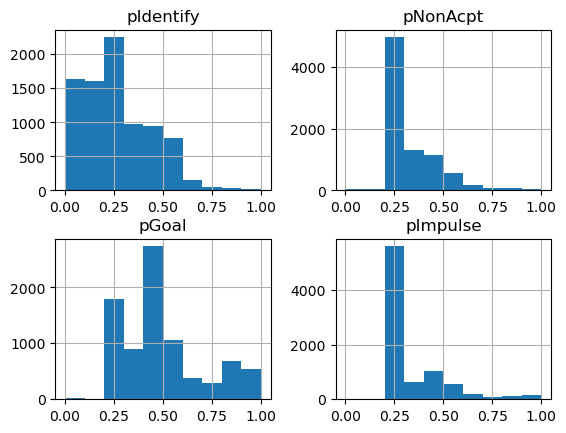

In [13]:
subscales = ['pIdentify', 'pNonAcpt', 'pGoal', 'pImpulse']
df.hist(column=subscales)

### Hist for Males

In [23]:
df[df['gender1']==1].shape

(5056, 1441)

array([[<Axes: title={'center': 'pIdentify'}>,
        <Axes: title={'center': 'pNonAcpt'}>],
       [<Axes: title={'center': 'pGoal'}>,
        <Axes: title={'center': 'pImpulse'}>]], dtype=object)

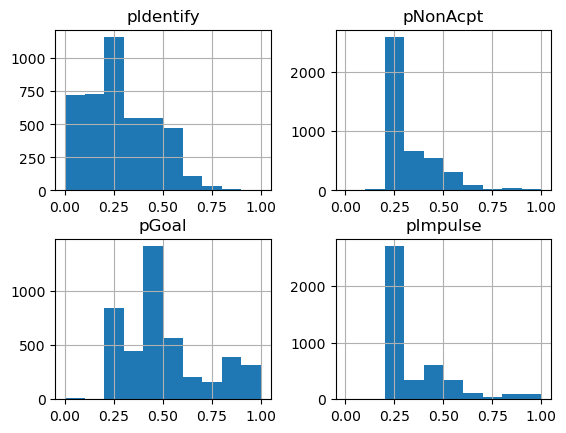

In [16]:
df[df['gender1']==1].hist(column=subscales)

In [22]:
print('Number of missing values for Male')
df.loc[df['gender1']==1, subscales].isnull().sum()

Number of missing values for Male


pIdentify    715
pNonAcpt     715
pGoal        715
pImpulse     715
dtype: int64

MALE - POMS


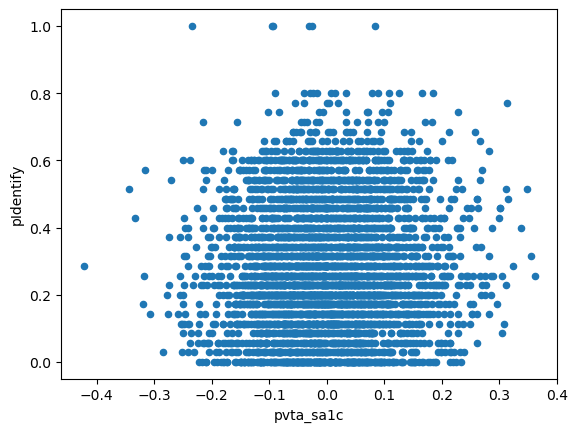

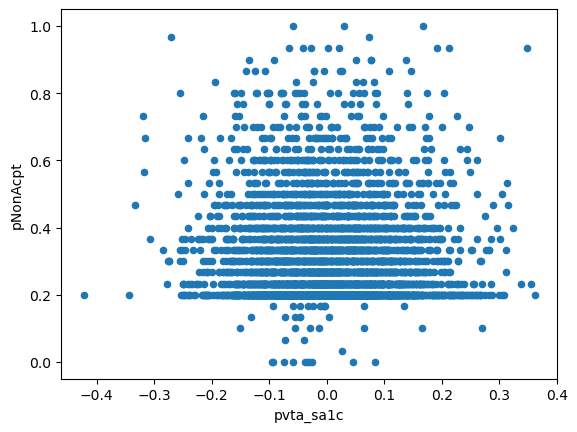

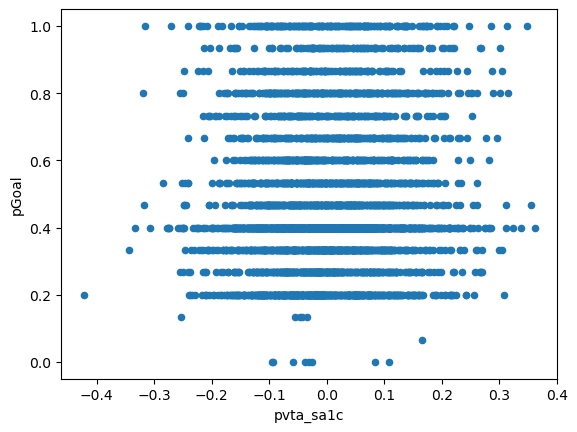

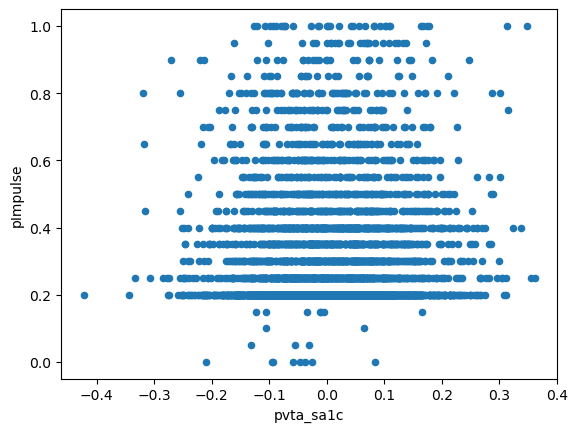

In [36]:
print('MALE - POMS')
for scale in subscales:    
    df[df['gender1']==1].plot.scatter(x='pvta_sa1c', y=scale)

MALE - RAW


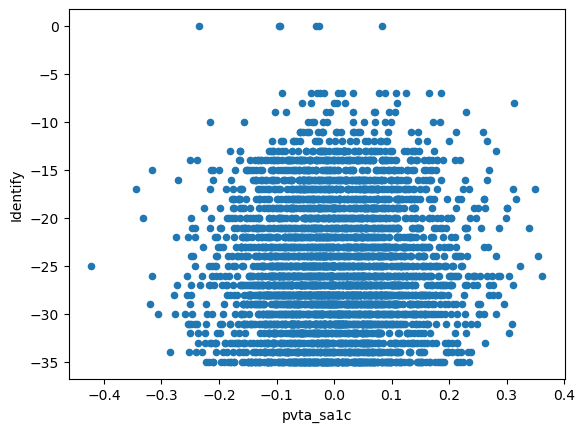

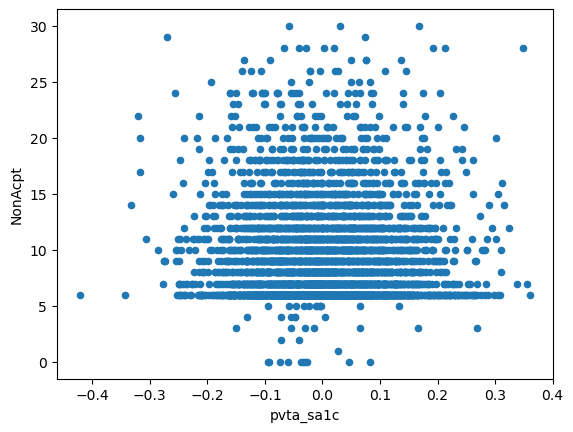

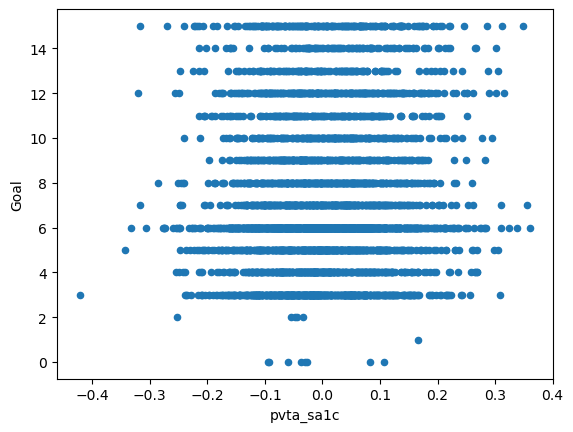

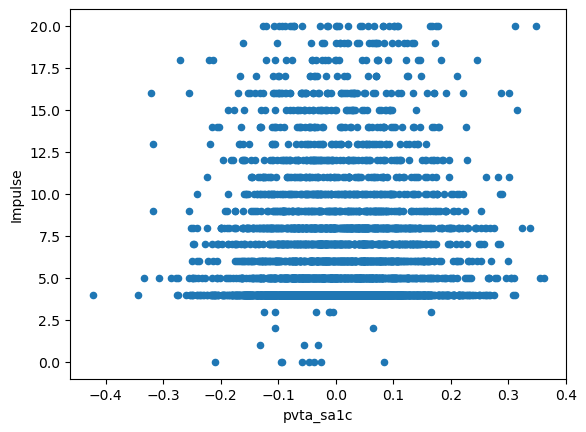

In [39]:
sscale_raw = ['Identify', 'NonAcpt', 'Goal', 'Impulse']
print('MALE - RAW')
for scale in sscale_raw:    
    df[df['gender1']==1].plot.scatter(x='pvta_sa1c', y=scale)

# Plots for Females

In [17]:
df[df['gender1']==2].shape

(4825, 1441)

In [30]:
df.loc[df['gender1']==2, 'UnempR1']

0             NaN
7        3.634927
8        7.080460
9       11.137108
10      21.941122
          ...    
9875     0.865672
9876    12.947369
9878     1.898102
9879     7.282110
9880    16.401846
Name: UnempR1, Length: 4825, dtype: float64

array([[<Axes: title={'center': 'IPR1r'}>]], dtype=object)

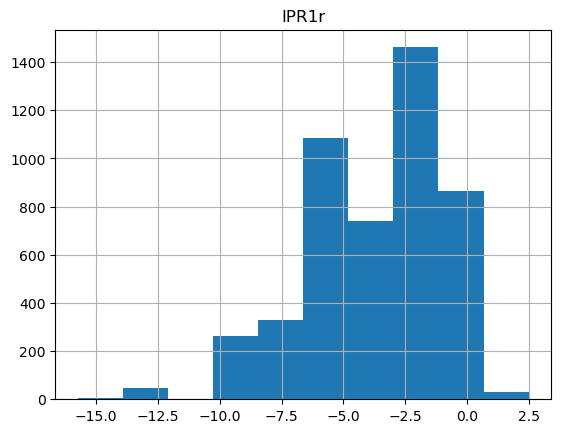

In [31]:
df[df['gender1']==2].hist(column='IPR1r')

array([[<Axes: title={'center': 'UnempR1'}>]], dtype=object)

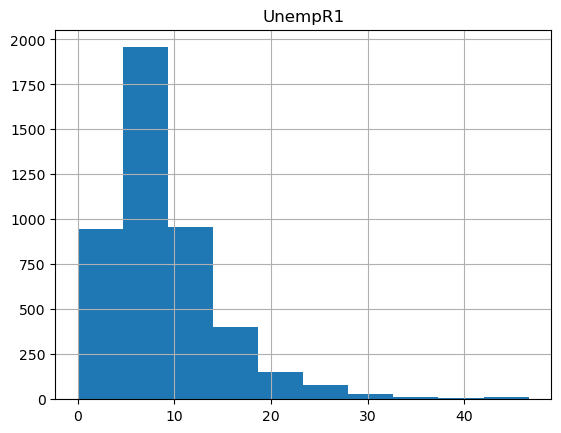

In [29]:
df[df['gender1']==2].hist(column='UnempR1')

array([[<Axes: title={'center': 'SingPH1'}>]], dtype=object)

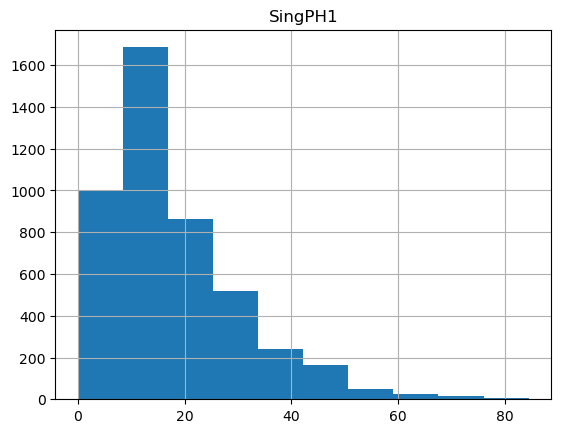

In [28]:
df[df['gender1']==2].hist(column='SingPH1')

array([[<Axes: title={'center': 'pIdentify'}>,
        <Axes: title={'center': 'pNonAcpt'}>],
       [<Axes: title={'center': 'pGoal'}>,
        <Axes: title={'center': 'pImpulse'}>]], dtype=object)

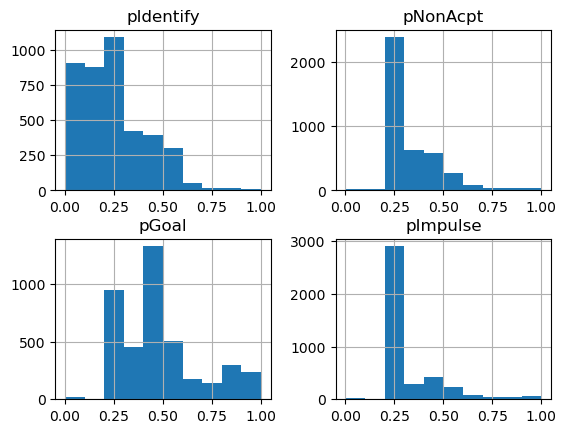

In [15]:
df[df['gender1']==2].hist(column=subscales)

In [20]:
print('Number of missing values for Female')
df.loc[df['gender1']==2, subscales].isnull().sum()

Number of missing values for Female


pIdentify    727
pNonAcpt     727
pGoal        727
pImpulse     727
dtype: int64

### Scatter plots

FEMALE


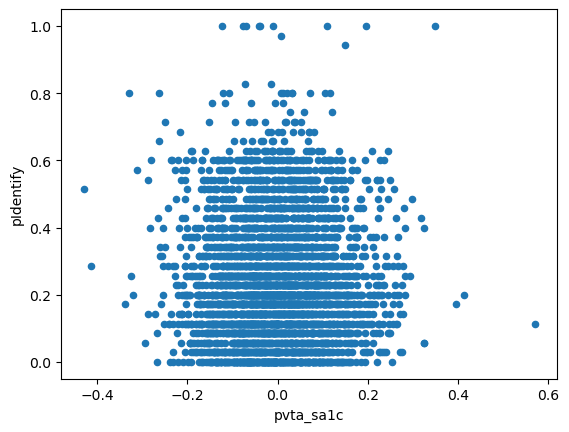

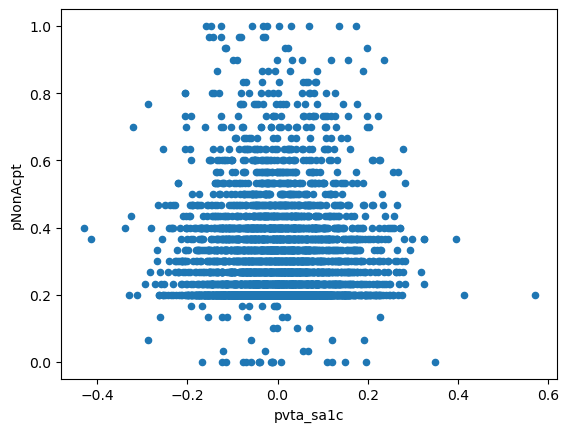

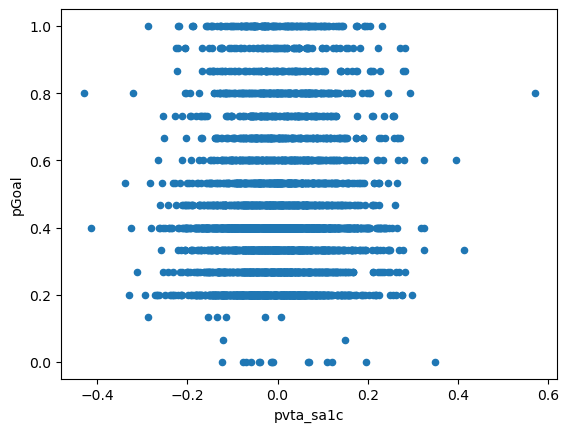

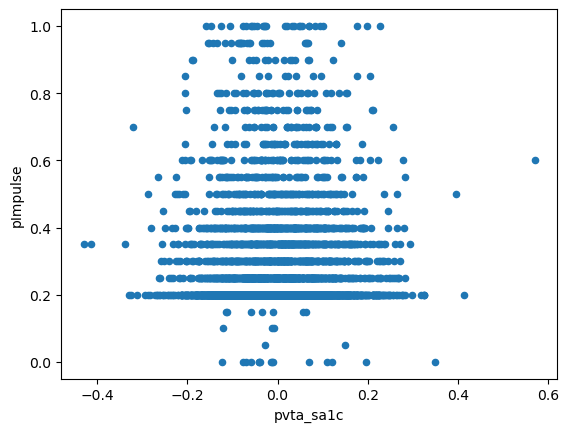

In [33]:
print('FEMALE')
for scale in subscales:    
    df[df['gender1']==2].plot.scatter(x='pvta_sa1c', y=scale)

FEMALE - RAW


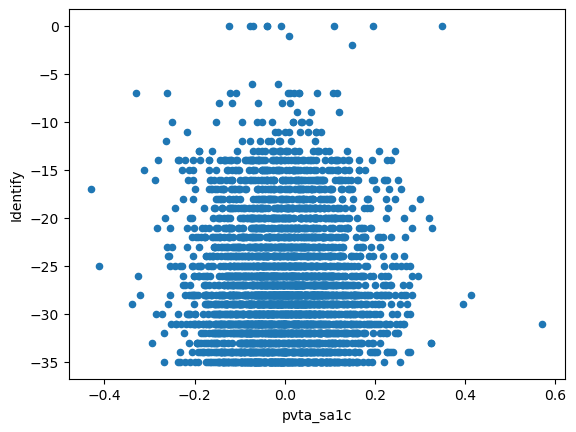

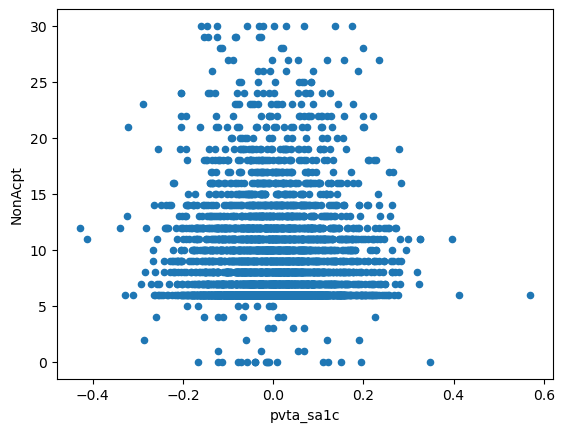

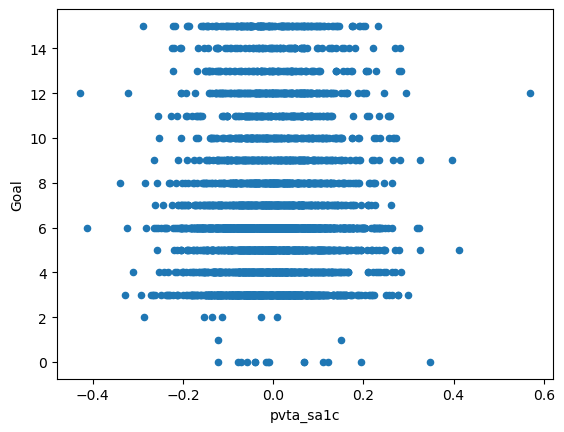

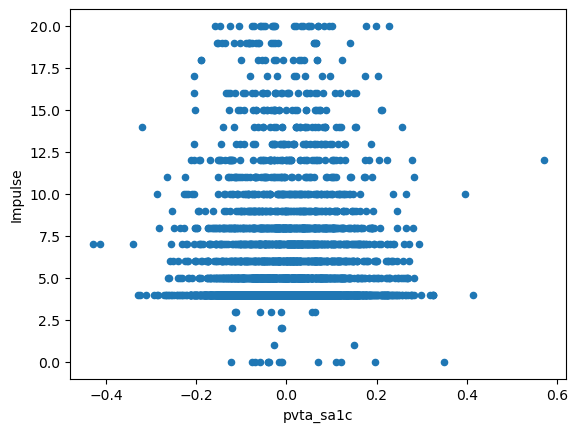

In [40]:
sscale_raw = ['Identify', 'NonAcpt', 'Goal', 'Impulse']
print('FEMALE - RAW')
for scale in sscale_raw:    
    df[df['gender1']==2].plot.scatter(x='pvta_sa1c', y=scale)

### Misc

In [32]:
[c for c in df.columns if 'pensi' in c]

['prpensit1',
 'ppensity1',
 'Sppensity1',
 'prpensit5',
 'ppensity5',
 'Sppensity5',
 'prpensit9',
 'ppensity9',
 'Sppensity9']

### Test correlation of Threatf and HSESf
* to see if Threatf can be used as a ancilary variable in imputing DERS items

In [8]:
df[['Threatf', 'PosUrg', 'NegUrg', 'income1', 'HSESf']].corr()

,Threatf,PosUrg,NegUrg,income1,HSESf
Threatf,1.000000,0.075750,0.084982,-0.100891,0.088416
PosUrg,0.075750,1.000000,0.838318,-0.125241,0.135624
NegUrg,0.084982,0.838318,1.000000,-0.082203,0.090602
income1,-0.100891,-0.125241,-0.082203,1.000000,-0.795743
HSESf,0.088416,0.135624,0.090602,-0.795743,1.000000


In [7]:
df.head()

,subID,Aware,NoAcpt,Implse,Goals,Threat,Threatf,Deprv,HSES,NBDeprv,PosUrg,NegUrg,LackPln,SenSeek,ERReApp,ERSupp,ThreatSQ,ThreatCB,sa_ad1,sa_cgc1,sa_ca1,sa_dla1,sa_fo1,sa_n1,sa_rspltp1,sa_sa1,sa_smh1,sa_smm1,sa_vs1,dt_ad1,dt_cgc1,dt_ca1,dt_dt1,dt_dla1,dt_fo1,dt_n1,dt_rspltp1,dt_sa1,dt_smh1,dt_smm1,dt_vs1,smh_smh1,dla_dla1,vta_ad1,vta_cgc1,vta_ca1,vta_dt1,vta_dla1,vta_fo1,vta_n1,vta_rspltp1,vta_sa1,vta_smh1,vta_smm1,vta_vta1,vs_vta1,eventname1,sa_aalh1,sa_aarh1,sa_aglh1,sa_agrh1,sa_bs1,sa_cdelh1,sa_cderh1,sa_crcxlh1,sa_crcxrh1,sa_hplh1,sa_hprh1,sa_pllh1,sa_plrh1,sa_ptlh1,sa_ptrh1,sa_thplh1,sa_thprh1,sa_vtdclh1,sa_vtdcrh1,df_aalh1,df_aarh1,df_aglh1,df_agrh1,df_bs1,df_cdelh1,df_cderh1,df_crcxlh1,df_crcxrh1,df_hplh1,df_hprh1,df_pllh1,df_plrh1,df_ptlh1,df_ptrh1,df_thplh1,df_thprh1,df_vtdclh1,df_vtdcrh1,vta_aalh1,vta_aarh1,vta_aglh1,vta_agrh1,vta_cdelh1,...,ders_upset_embarrassed_p_7,ders_upset_embarrassed_p_9,ders_upset_emotion_overwhelm_7,ders_upset_emotion_overwhelm_9,ders_upset_esteem_p_7,ders_upset_esteem_p_9,ders_upset_feel_better_7,ders_upset_feel_better_9,ders_upset_fixation_p_7,ders_upset_fixation_p_9,ders_upset_focus_p_7,ders_upset_focus_p_9,ders_upset_guilty_p_7,ders_upset_guilty_p_9,ders_upset_irritation_p_7,ders_upset_irritation_p_9,ders_upset_long_time_7,ders_upset_long_time_9,ders_upset_lose_control_7,ders_upset_lose_control_9,ders_upset_out_control_7,ders_upset_out_control_9,ders_upset_time_p_7,ders_upset_time_p_9,ders_upset_weak_p_7,ders_upset_weak_p_9,erq_feelings_control_7,erq_feelings_control_9,erq_feelings_happy_7,erq_feelings_happy_9,erq_feelings_hide_7,erq_feelings_hide_9,erq_feelings_less_7,erq_feelings_less_9,erq_feelings_self_7,erq_feelings_self_9,erq_feelings_think_7,erq_feelings_think_9,erq_reapp_3_7,erq_reapp_4_9,erq_supp_3_7,erq_supp_4_9,adi_perc_W1,Pedud1,FamDep1,Pmeg_R_W1,empl_R_W1,IPR1,LowEdu1,SingPH1,UnempR1,HSES1g,HSES1,HSES1SQ,HSES1CB,subNum,IPR1r,HSESf,DERS,vta_sa1c,Motrs1c,age1c,HSES1c,income1c,LowEdu1c,Pedud1c,FamDep1c,UnempR1c,SingPH1c,IPR1Rc,pvta_sa1,pMotrs1,page1,pHSESf,pincome1,prace1,pDERS,pIdentify,pNonAcpt,pGoal,pImpulse,pLowEdu1,pPedud1,pFamDep1,pUnempR1,pSingPH1,pIPR1r,pvta_sa1c,pMotrs1c,page1c,pHSES1c,pincome1c,pLowEdu1c,pPedud1c,pFamDep1c,pUnempR1c,pSingPH1c,pIPR1Rc,pHSES1SQ,pHSES1CB
0,NDAR_INV003RTV85,-1.065495,-0.569822,-0.677579,-1.191441,-0.715499,-0.344874,-0.006645,NaN,0.815898,-0.152014,0.095506,0.646544,-0.344288,-0.935189,-0.998405,0.511938,-0.366291,0.006416,0.021945,0.041819,-0.043350,0.215066,0.023004,-0.158642,0.511476,-0.110895,0.082378,-0.150867,-0.116451,-0.241669,-0.002354,0.345007,-0.234391,0.008572,0.090937,0.033278,0.110278,-0.112629,-0.100976,-0.088894,0.314437,0.350544,0.030371,0.017104,-0.147819,0.104240,-0.101375,0.058050,0.044380,-0.181789,0.156427,-0.042587,-0.042176,0.233819,-0.155134,baseline_year_1_arm_1,0.161526,0.231572,0.175114,-0.104169,-0.050657,0.118217,0.414630,0.069444,-0.113659,-0.274035,-0.062580,-0.082889,0.096238,-0.029626,-0.083667,0.247253,0.117783,-0.129543,0.017039,0.329565,0.194284,-0.083103,0.057186,0.157341,-0.141171,-0.026373,-0.010895,-0.027565,0.030185,0.036097,0.166799,-0.098116,0.120868,-0.008540,-0.082872,-0.096747,0.182562,0.031598,-0.121166,-0.095990,-0.040662,-0.252743,0.100628,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN,48.924301,4.0,0.000000,0.0,0.0,2.232485,NaN,NaN,NaN,0.422107,0.422107,8.400804,24.349010,1,-2.232485,2.395,-2.813,0.067994,-0.114582,11.814796,2.898414,0.671734,NaN,1.781743,-0.065956,NaN,NaN,1.552940,0.530109,0.026352,0.923077,0.476911,0.777778,0.00,0.188273,0.028571,0.2,0.200000,0.20,NaN,0.75,0.000000,NaN,NaN,0.740841,0.100770,-0.023037,0.454415,0.145167,0.074637,NaN,0.445436,-0.065956,NaN,NaN,0.085135,0.021074,0.003059
1,NDAR_INV007W6H7B,-0.265431,-0.519306,0.020956,-0.482517,0.590892,0.623783,-2.345234,-2.345548,0.590109,-0.063553,-0.278382,0.533565,-0.586301,-0.201693,-1.001635,0.3

In [13]:
tf = df[['age1', 'famID1', 'scanID1', 'Motrs1', 'subID']]
tf.to_csv(dpath + 'ders_impute_aux_vars.csv', index=False)